In [ ]:
# Comment the following lines if you're not in colab:
from google.colab import drive
drive.mount('/content/drive')
# If you're in colab, cd to your own working directory here:
%cd ..//..//content//drive//MyDrive//Colab-Notebooks//HY-673-Tutorials//Tutorial-3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab-Notebooks/HY-673-Tutorials/Tutorial-3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)

## <u>Question 3b</u>

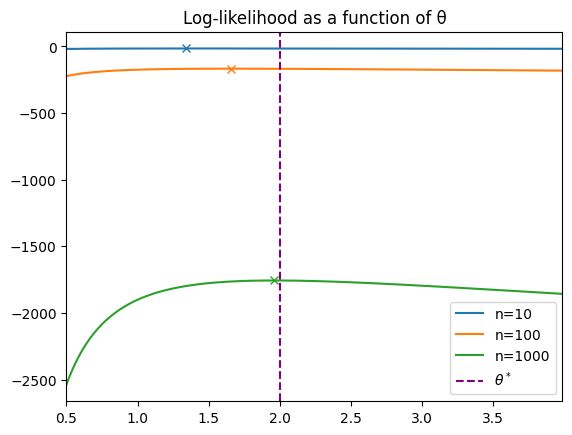

In [ ]:
n_list = [10, 100, 1_000]
# ground-truth variance:
theta_star = 2
# standard deviation:
sigma_star = np.sqrt(theta_star)
# range of thetas from 1 to 4:
theta = np.arange(start=0.5, stop=4, step=0.01)

plt.figure()
for idx_n, n in enumerate(n_list):

    x = sigma_star * np.random.randn(n)
    # the log-likelihood that we found analytically:
    log_likelihood = np.sum( -(x**2)[None, :]/(2*theta[:, None]) - np.log(2*np.pi*theta[:, None])/2, axis=1)
    # plot:
    plt.plot(theta, log_likelihood, color=f'C{idx_n}', label=f'n={n}')
    i_max = np.argmax(log_likelihood)
    plt.plot(theta[i_max], log_likelihood[i_max], 'x', color=f'C{idx_n}')

plt.xlim([min(theta), max(theta)])
plt.axvline(x=2, color='purple', linestyle='dashed', label="$θ^*$")
plt.title("Log-likelihood as a function of θ")
plt.legend()
# plt.savefig('data/ex3b.pdf', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

## <u>Question 3c</u>

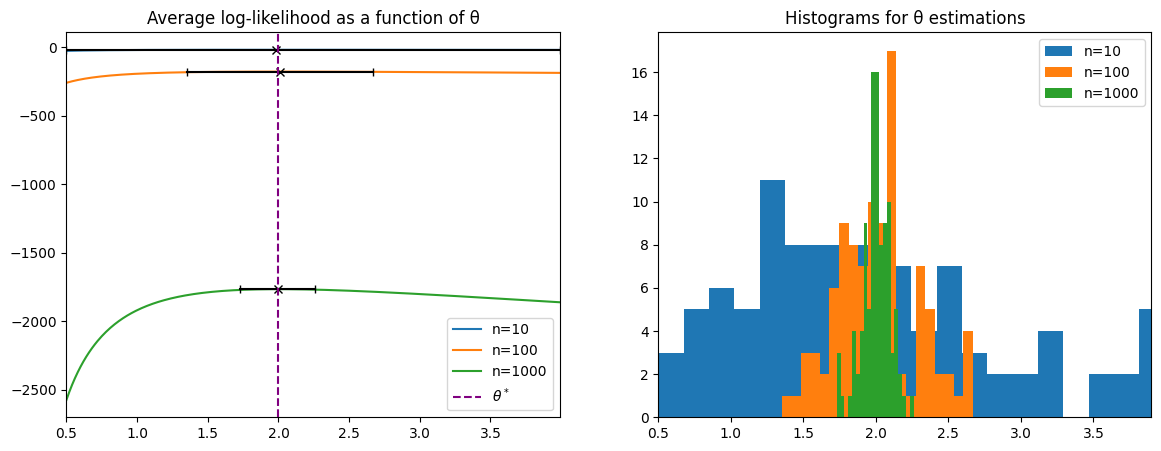

In [ ]:
# ground-truth variance:
theta_star = 2
# standard deviation:
sigma_star = np.sqrt(theta_star)
# range of thetas from 0.5 to 4:
theta = np.arange(0.5, 4, 0.01)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
for idx_n, n in enumerate(n_list):

    log_likelihoods = np.zeros((100, len(theta)))

    for it in range(100):
        x = sigma_star * np.random.randn(n)
        log_likelihoods[it] = np.sum( -(x**2)[None, :]/(2*theta[:, None]) - np.log(2*np.pi*theta[:, None])/2, axis=1)
    # average log-likelihood
    log_likelihood = np.mean(log_likelihoods, axis=0)
    ax[0].plot(theta, log_likelihood, color=f'C{idx_n}', label=f'n={n}')
    i_max = np.argmax(log_likelihood)
    ax[0].plot(theta[i_max], log_likelihood[i_max], 'x', color='black')

    # plot minimum and maximum argmax over the 100 iters (horizontal bar)
    i_maxima = np.argmax(log_likelihoods, axis=1)
    ax[0].plot([theta[i_maxima.min()], theta[i_maxima.max()]], [log_likelihood[i_max], log_likelihood[i_max]], '|-', color='black')
    ax[1].hist(theta[i_maxima], color=f'C{idx_n}', bins=20, label=f'n={n}')

ax[0].set_xlim([min(theta), max(theta)])
ax[0].axvline(x=2, color='purple', linestyle='dashed', label="$θ^*$")
ax[0].legend(loc="lower right")
ax[0].set_title("Average log-likelihood as a function of θ")
ax[1].set_xlim([0.5, 3.9])
ax[1].legend(loc="upper right")
ax[1].set_title("Histograms for θ estimations")
# plt.savefig('data/ex3c.pdf', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()